In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('C:\\Users\\ryan\\Desktop\\Thinkful DS Sample Data - Main Course\\Unit 1\\ESSdata_Thinkful.csv')
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [35]:
#Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
#Years 6 and 7 correspond to 2012 and 2014
comp = df[(df.year == 6) | (df.year == 7)]

#Method 1
print(comp[['cntry', 'year', 'ppltrst']].groupby(['cntry', 'year']).mean())

#Method 2
for country in comp.cntry.unique():
    for year in comp.year.unique():
        print('Country: ', country, ".",  "Year: ", year, ".", "Avg. Trust: "
              , comp[(comp.cntry == country) & (comp.year == year)].ppltrst.mean())

             ppltrst
cntry year          
CH    6     5.677878
      7     5.751617
CZ    6     4.362519
      7     4.424658
DE    6     5.214286
      7     5.357143
ES    6     5.114592
      7     4.895128
NO    6     6.649315
      7     6.598630
SE    6     6.058499
      7     6.257709
Country:  CH . Year:  6 . Avg. Trust:  5.67787839586
Country:  CH . Year:  7 . Avg. Trust:  5.75161707633
Country:  CZ . Year:  6 . Avg. Trust:  4.36251920123
Country:  CZ . Year:  7 . Avg. Trust:  4.42465753425
Country:  DE . Year:  6 . Avg. Trust:  5.21428571429
Country:  DE . Year:  7 . Avg. Trust:  5.35714285714
Country:  ES . Year:  6 . Avg. Trust:  5.11459192086
Country:  ES . Year:  7 . Avg. Trust:  4.89512799339
Country:  NO . Year:  6 . Avg. Trust:  6.64931506849
Country:  NO . Year:  7 . Avg. Trust:  6.59863013699
Country:  SE . Year:  6 . Avg. Trust:  6.05849889625
Country:  SE . Year:  7 . Avg. Trust:  6.2577092511


In [38]:
#Did people become happier from 2012 to 2014? Compute results for each country in the sample.
#Years 6 and 7 correspond to 2012 and 2014
comp = df[(df.year == 6) | (df.year == 7)]

#Method 1
print(comp[['cntry', 'year', 'happy']].groupby(['cntry', 'year']).mean())

#Method 2
for country in comp.cntry.unique():
    for year in comp.year.unique():
        print('Country: ', country, ".",  "Year: ", year, ".", "Avg. Happiness: "
              , comp[(comp.cntry == country) & (comp.year == year)].happy.mean())

               happy
cntry year          
CH    6     8.088312
      7     8.116429
CZ    6     6.770898
      7     6.914110
DE    6     7.428571
      7     7.857143
ES    6     7.548680
      7     7.419967
NO    6     8.251719
      7     7.915185
SE    6     7.907387
      7     7.946961
Country:  CH . Year:  6 . Avg. Happiness:  8.08831168831
Country:  CH . Year:  7 . Avg. Happiness:  8.11642949547
Country:  CZ . Year:  6 . Avg. Happiness:  6.77089783282
Country:  CZ . Year:  7 . Avg. Happiness:  6.91411042945
Country:  DE . Year:  6 . Avg. Happiness:  7.42857142857
Country:  DE . Year:  7 . Avg. Happiness:  7.85714285714
Country:  ES . Year:  6 . Avg. Happiness:  7.54867986799
Country:  ES . Year:  7 . Avg. Happiness:  7.4199669967
Country:  NO . Year:  6 . Avg. Happiness:  8.25171939477
Country:  NO . Year:  7 . Avg. Happiness:  7.91518467852
Country:  SE . Year:  6 . Avg. Happiness:  7.90738699008
Country:  SE . Year:  7 . Avg. Happiness:  7.94696132597


In [42]:
#Who reported watching more TV in 2012, men or women?

comp = df[(df.year == 6)]

#Method 1
print(comp[['gndr', 'tvtot']].groupby(['gndr']).mean())

#Men = 1, Women = 2

#Method 2
for gender in comp.gndr.unique():
    if gender == 1.0:
        print("Gender: Male.", "Avg. Hours of TV per Weekday: "
              , comp[(comp.gndr == gender)].tvtot.mean())
    else:
        print("Gender: Female.", "Avg. Hours of TV per Weekday: "
              , comp[(comp.gndr == gender)].tvtot.mean())
        

         tvtot
gndr          
1.0   3.901906
2.0   3.944393
Gender: Female. Avg. Hours of TV per Weekday:  3.94439252336
Gender: Male. Avg. Hours of TV per Weekday:  3.90190609019


In [75]:
#Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

comp = df[(df.year == 6)]

#Method 1
print(comp[['partner', 'pplfair']].groupby(['partner']).mean())

#There are some NaN values for partner - drop them

comp = comp.dropna(subset = ['partner'])

#Method 2
for partner in comp.partner.unique():
    if partner == 1.0:
        print("Living Situation: Lives with partner(s).", "Avg. Level of Perceived Fairness: "
              , comp[(comp.partner == partner)].pplfair.mean())
    else:
        print("Living Situation: Lives alone.", "Avg. Level of Perceived Fairness: "
              , comp[(comp.partner == partner)].pplfair.mean())

          pplfair
partner          
1.0      6.080736
2.0      5.856965
Living Situation: Lives with partner(s). Avg. Level of Perceived Fairness:  6.08073601202
Living Situation: Lives alone. Avg. Level of Perceived Fairness:  5.85696517413


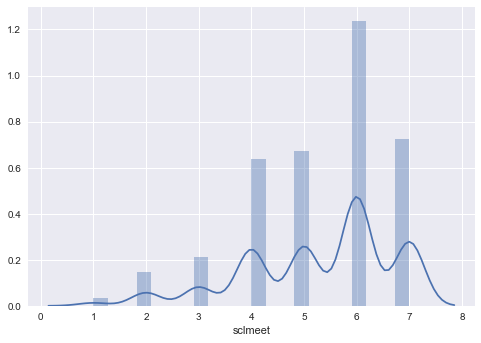

ANOVA 3-way test
F_onewayResult(statistic=7.8889073426891425, pvalue=0.00038301513884460325)
Switzerland vs Spain:
Ttest_indResult(statistic=-1.5343317353073618, pvalue=0.12510774525042745)
Sweden vs Spain:
Ttest_indResult(statistic=2.6495472685800778, pvalue=0.0081199227965129493)
Sweden vs Switzerland:
Ttest_indResult(statistic=4.0371310444030621, pvalue=5.6545986003135322e-05)
        sclmeet
cntry          
CH     5.160622
ES     5.260116
SE     5.426211


In [96]:
#Pick three or four of the countries in the sample and compare how often people met socially in 2014. 
#Are there differences, and if so, which countries stand out?

df2 = df[(df.cntry == 'CH') & (df.year == 7) | (df.cntry == 'ES') & (df.year == 7) | (df.cntry == 'SE') & (df.year == 7)]
df3 = df2[['cntry', 'sclmeet', 'sclact']]

#Drop Nan Vals
df3 = df3.dropna(subset = ['sclmeet'])

sns.distplot(df3['sclmeet'])
plt.show()

#Data is not really normal - still okay to use ANOVA? Should I use non-parametric test?

print('ANOVA 3-way test')
print(stats.f_oneway(df3[df3.cntry == 'CH'].sclmeet,
                     df3[df3.cntry == 'ES'].sclmeet,
                     df3[df3.cntry == 'SE'].sclmeet))

#Difference is significant (p < 0.05) - Which countries stand out?

print('Switzerland vs Spain:')
print(stats.ttest_ind(df3[df3.cntry == 'CH'].sclmeet,
                      df3[df3.cntry == 'ES'].sclmeet))


print('Sweden vs Spain:')
print(stats.ttest_ind(df3[df3.cntry == 'SE'].sclmeet,
                      df3[df3.cntry == 'ES'].sclmeet))


print('Sweden vs Switzerland:')
print(stats.ttest_ind(df3[df3.cntry == 'SE'].sclmeet,
                      df3[df3.cntry == 'CH'].sclmeet))


print(df3[['cntry', 'sclmeet']].groupby('cntry').mean())

#Sweden sticks out.

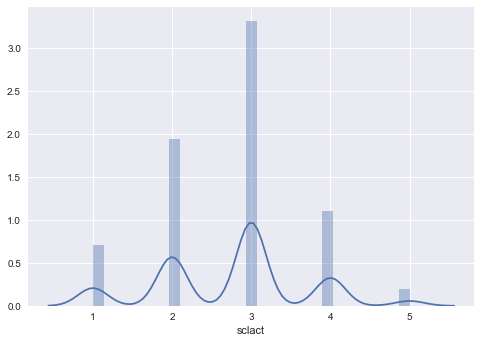

ANOVA 3-way test
F_onewayResult(statistic=22.028167439547552, pvalue=3.2096123170558474e-10)
Switzerland vs Spain:
Ttest_indResult(statistic=3.7901178679751157, pvalue=0.00015515309017284228)
Sweden vs Spain:
Ttest_indResult(statistic=6.5002573458665971, pvalue=1.0000807299873861e-10)
Sweden vs Switzerland:
Ttest_indResult(statistic=2.247107750003853, pvalue=0.024763496042596676)
         sclact
cntry          
CH     2.781699
ES     2.616878
SE     2.879425


In [99]:
#Pick three or four of the countries in the sample and compare how often people took part in social activities, 
#relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

df2 = df[(df.cntry == 'CH') & (df.year == 7) | (df.cntry == 'ES') & (df.year == 7) | (df.cntry == 'SE') & (df.year == 7)]
df4 = df2[['cntry', 'sclmeet', 'sclact']]

#Drop Nan Vals
df4 = df4.dropna(subset = ['sclact'])

sns.distplot(df4['sclact'])
plt.show()

#Data looks fairly normal - okay to use ANOVA? Should I use non-parametric test?

print('ANOVA 3-way test')
print(stats.f_oneway(df4[df4.cntry == 'CH'].sclact,
                     df4[df4.cntry == 'ES'].sclact,
                     df4[df4.cntry == 'SE'].sclact))

#Difference is significant (p < 0.05) - Which countries stand out?

print('Switzerland vs Spain:')
print(stats.ttest_ind(df4[df4.cntry == 'CH'].sclact,
                      df4[df4.cntry == 'ES'].sclact))


print('Sweden vs Spain:')
print(stats.ttest_ind(df4[df4.cntry == 'SE'].sclact,
                      df4[df4.cntry == 'ES'].sclact))


print('Sweden vs Switzerland:')
print(stats.ttest_ind(df4[df4.cntry == 'SE'].sclact,
                      df4[df4.cntry == 'CH'].sclact))


print(df4[['cntry', 'sclact']].groupby('cntry').mean())

#Spain sticks out.